<a href="https://colab.research.google.com/github/Vincenzo-Miracula/Zayed-University/blob/main/Kmeans_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KMeans Clustering
Cluster analysis is a technique used in data mining and machine learning to group similar objects into clusters. K-means clustering is a widely used method for cluster analysis where the aim is to partition a set of objects into K clusters in such a way that the sum of the squared distances between the objects and their assigned cluster mean is minimized.

In [300]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
home_data = pd.read_csv('/content/californiahousing.csv', sep=';', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

In [ ]:
home_data.shape

In [ ]:
home_data.info()

In [ ]:
home_data.isna().sum()

In [ ]:
home_data.describe().T

In [ ]:
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value', palette='flare')

In [212]:
X = home_data[['latitude', 'longitude']]
y = home_data[['median_house_value']]

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [214]:
minmax = MinMaxScaler()
X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

In [ ]:
# Lista per salvare i valori di inertia
inertia_values = []

# Range di valori di k che si desidera esplorare
k_values = range(2, 11)

# Calcolo dell'inertia per ogni valore di k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_minmax)
    inertia_values.append(kmeans.inertia_)

# Plot del metodo del gomito
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metodo del Gomito per la Scelta di k')
plt.xticks(k_values)
plt.show()

In [ ]:
k = 5  # Optimum number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_minmax)

In [242]:
# Get cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [ ]:
sns.scatterplot(data=X_train_minmax, x='longitude', y='latitude', hue=kmeans.labels_, palette='flare')

In [ ]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_train_minmax, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Get the inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print("Inertia:", inertia)

In [220]:
y_test['labels'] = kmeans.predict(X_test_minmax)

In [245]:
new_house = [[38.70, -120.49]]

In [ ]:
kmeans.predict(new_house)

### Obsevation:![image_dab23a4c33.png](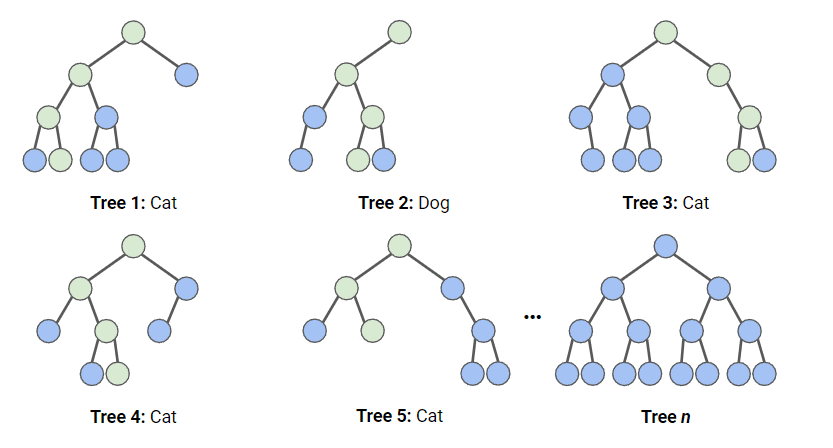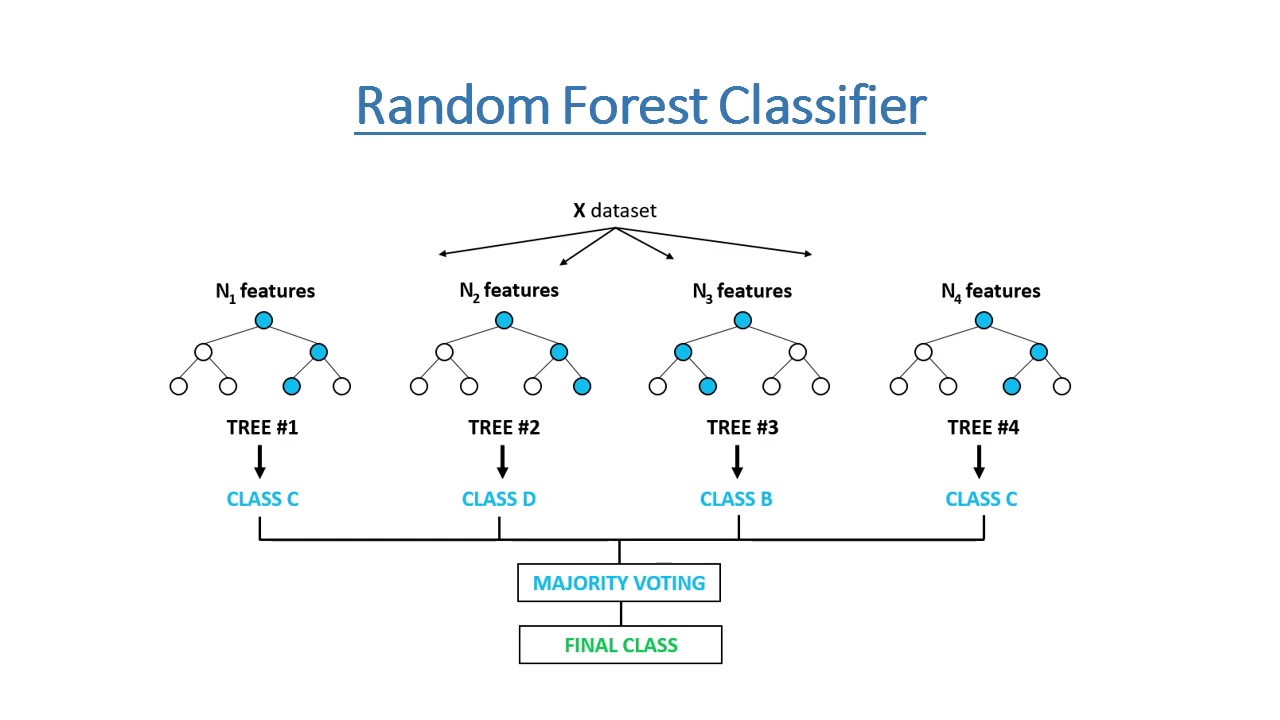)

1 . The silhouette score of approximately 0.495 suggests that the clusters are reasonably well-separated, indicating a good clustering solution.

2 . The fact that both the silhouette score and inertia are provided here and the inertia value remains unchanged at 139.82 indicates that while the clusters are relatively compact.

3 . There may be some overlapping or less clear boundaries between clusters, which is reflected in the silhouette score being slightly below 0.5.

## Random Forest
Imagine you have a complex problem to solve, and you gather a group of experts from different fields to provide their input. Each expert provides their opinion based on their expertise and experience. Then, the experts would vote to arrive at a final decision.

In a random forest classification, multiple decision trees are created using different random subsets of the data and features. Each decision tree is like an expert, providing its opinion on how to classify the data. Predictions are made by calculating the prediction for each decision tree, then taking the most popular result. (For regression, predictions use an averaging technique instead.)

In the diagram below, we have a random forest with n decision trees, and we’ve shown the first 5, along with their predictions (either “Dog” or “Cat”). Each tree is exposed to a different number of features and a different sample of the original dataset, and as such, every tree can be different. Each tree makes a prediction. Looking at the first 5 trees, we can see that 4/5 predicted the sample was a Cat. The green circles indicate a hypothetical path the tree took to reach its decision. The random forest would count the number of predictions from decision trees for Cat and for Dog, and choose the most popular prediction.



In [263]:
cars = pd.read_csv('/content/car_evaluation.csv')

In [264]:
cars.columns = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety','Evaluation']
cars.shape

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [265]:
#Let's check if there are any missing values in our dataset
cars.isnull().sum()

Buying        0
Maint         0
Doors         0
Persons       0
LugBoot       0
Safety        0
Evaluation    0
dtype: int64

In [268]:
#We see that there are no missing values in our dataset
#Let's take a more analytical look at our dataset
cars.describe().T

,count,unique,top,freq
Buying,1727,4,high,432
Maint,1727,4,high,432
Doors,1727,4,3,432
Persons,1727,3,4,576
LugBoot,1727,3,med,576
Safety,1727,3,med,576
Evaluation,1727,4,unacc,1209


In [267]:
#We realize that our data has categorical values
cars.columns

Index(['Buying', 'Maint', 'Doors', 'Persons', 'LugBoot', 'Safety',
       'Evaluation'],
      dtype='object')

In [269]:
#Lets find out the number of cars in each evaluation category
cars['Evaluation'].value_counts().sort_index()

Evaluation
acc       384
good       69
unacc    1209
vgood      65
Name: count, dtype: int64

In [270]:
cars.Doors.replace(('5more'),('5'),inplace=True)
cars.Persons.replace(('more'),('5'),inplace=True)

In [272]:
for col in cars.columns:

    print(cars[col].value_counts())

Buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
Maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
Doors
3    432
4    432
5    432
2    431
Name: count, dtype: int64
Persons
4    576
5    576
2    575
Name: count, dtype: int64
LugBoot
med      576
big      576
small    575
Name: count, dtype: int64
Safety
med     576
high    576
low     575
Name: count, dtype: int64
Evaluation
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [273]:
X = cars.drop(['Evaluation'], axis=1)
y = cars['Evaluation']

In [ ]:
# declare feature vector and target variable
#X = df.drop(['Evaluation', 'Doors'], axis=1)
#y = df['Evaluation']

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [275]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [ ]:
X_train.dtypes

In [277]:
!pip install category_encoders

In [278]:
import category_encoders as ce

In [280]:
encoder = ce.OrdinalEncoder(cols=['Buying', 'Maint', 'Doors', 'Persons', 'LugBoot', 'Safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [285]:
# instantiate the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [286]:
# Predict the Test set results
y_pred = clf.predict(X_test)

In [287]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9649


In [288]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Safety     0.291657
Persons    0.235380
Buying     0.160692
Maint      0.134143
LugBoot    0.111595
Doors      0.066533
dtype: float64

In [304]:
X_train

,Buying,Maint,Doors,Persons,LugBoot,Safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1
...,...,...,...,...,...,...
1130,3,3,2,2,3,1
1294,3,4,1,2,3,3
860,2,4,1,2,3,1
1459,4,2,3,1,2,3


In [308]:
new_car = [[1, 2, 3, 3, 1, 2]]

In [309]:
clf.predict(new_car)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['unacc'], dtype=object)

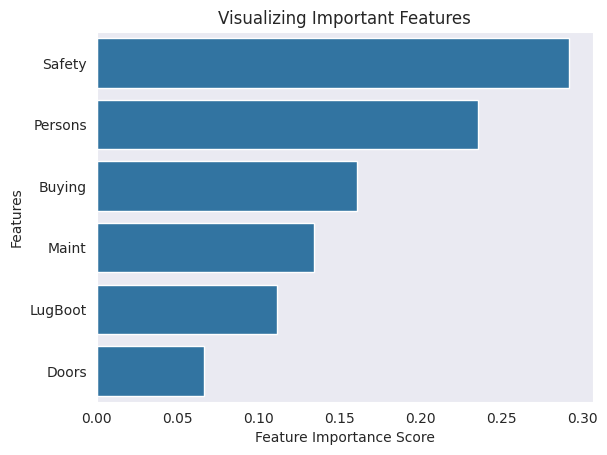

In [291]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

In [294]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[119   2   5   1]
 [  1  13   2   2]
 [  2   0 397   0]
 [  5   0   0  21]]


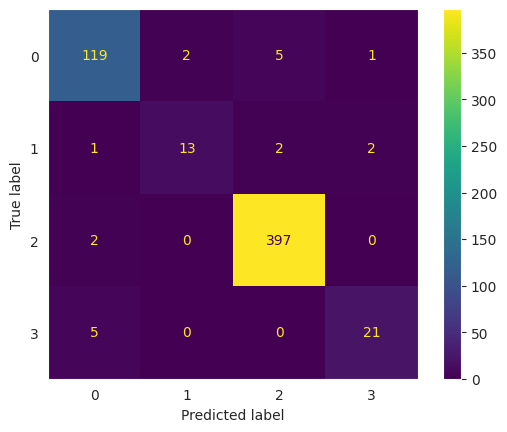

In [301]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [295]:
cr = classification_report(y_test, y_pred)
print('Classification report\n\n', cr)

Classification report

               precision    recall  f1-score   support

         acc       0.94      0.94      0.94       127
        good       0.87      0.72      0.79        18
       unacc       0.98      0.99      0.99       399
       vgood       0.88      0.81      0.84        26

    accuracy                           0.96       570
   macro avg       0.92      0.87      0.89       570
weighted avg       0.96      0.96      0.96       570



In [ ]:
from sklearn.tree import export_graphviz
import graphviz
# Export the first three decision trees from the forest
for i in range(3):
    tree = clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=True,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

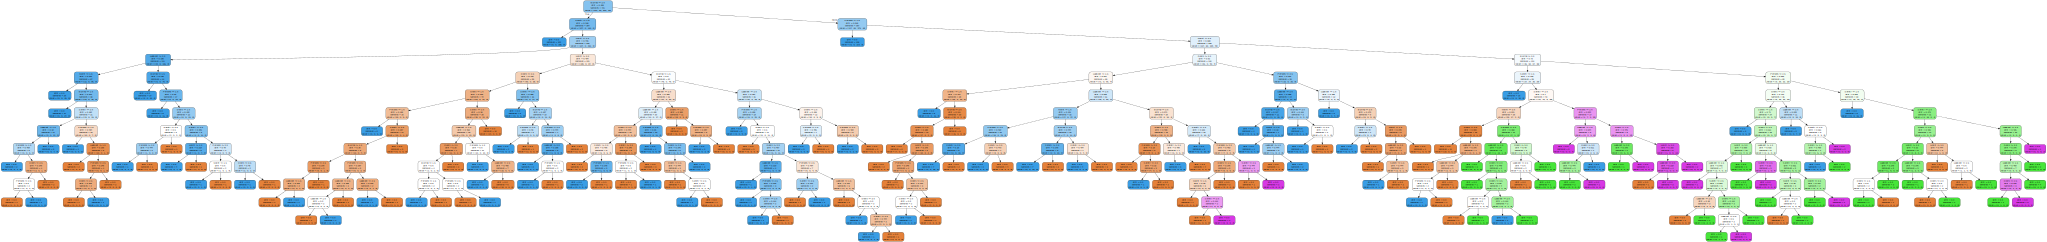

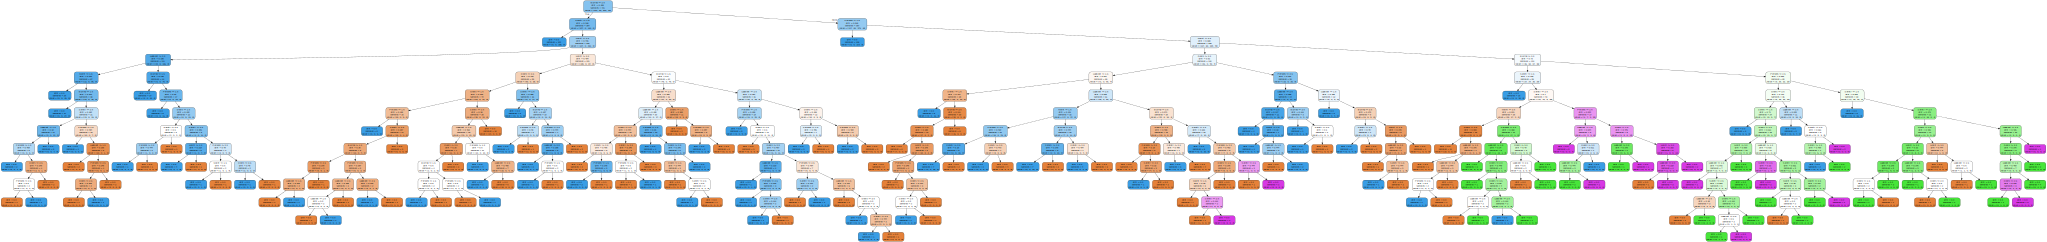

In [329]:
for i in range(2):
  tree_in_forest = clf.estimators_[0]
  dot_data = export_graphviz(tree_in_forest,
                feature_names=X.columns,
                filled=True,
                rounded=True)
  graph = graphviz.Source(dot_data)
  graph.render("decision_tree")
  display(graph)